# Programación para la Bioinformática

Unidad 3: Librerías científicas en Python - Matplotlib - Ejercicios
------------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 2. Bajo estas lineas encontrareis Ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.)

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)

In [1]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00


###**Ejercicios de entrenamiento**

### **Ejercicio 1**


Haced un gráfico en el que se vea la progresión del rmsd a lo largo del tiempo, de los pasos de una dinámica molecular. Los valores de RMSD y los pasos de tiempo se encuentran en el fichero msd_uoc.dat. La primera columna corresponde a los pasos de tiempo, la segunda al backbone de la proteina, la tercera al substrato y la cuarta al centro activo.

El gráfico tiene que tener definido:

* Titulo en el eje x e y (con un tamaño de la letra de 14)
* Leyenda
* Cambiáis los colores predeterminados para cada columna dibujada

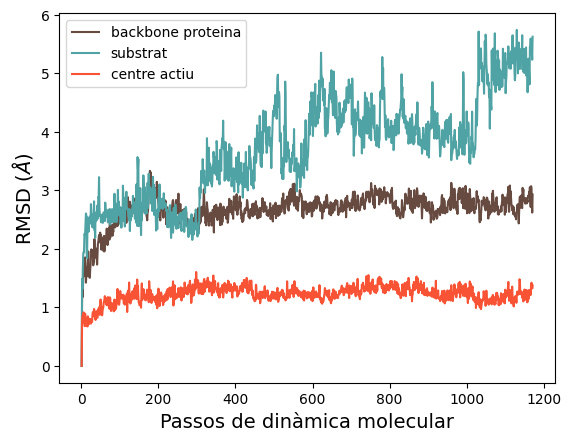

In [3]:
# Ejecutad primero esta celda para obtener el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/rmsd_uoc.dat --no-check-certificate

--2025-04-29 18:22:04--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/rmsd_uoc.dat
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 18.201.253.30
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|18.201.253.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69810 (68K) [text/plain]
Saving to: ‘rmsd_uoc.dat’

rmsd_uoc.dat        100%[===================>]  68.17K   236KB/s    in 0.3s    

2025-04-29 18:22:05 (236 KB/s) - ‘rmsd_uoc.dat’ saved [69810/69810]



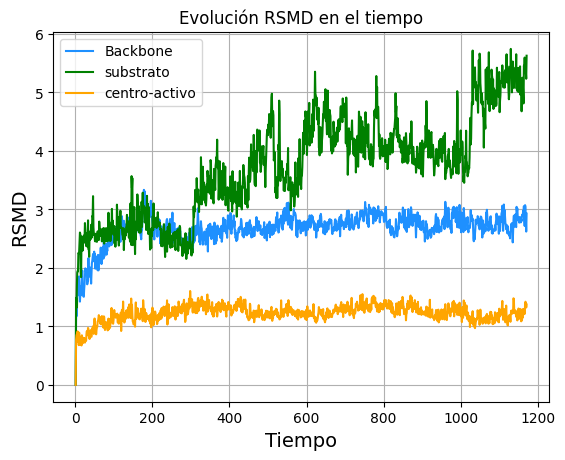

In [4]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

# importamos los módulos necesarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# RESPUESTA
# Cargamos los datos del archivo
datos = np.loadtxt('rmsd_uoc.dat')

# Separamos las columnas
tiempo = datos[:, 0]
rsmd_backbone = datos[:, 1]
rsmd_substrato = datos[:, 2]
rsmd_centroactivo = datos[:, 3]

# Creamos la gráfica con pt.plot
plt.plot(tiempo, rsmd_backbone, label='Backbone', color='dodgerblue')
plt.plot(tiempo, rsmd_substrato, label='substrato', color='green')
plt.plot(tiempo, rsmd_centroactivo, label='centro-activo', color='orange')

# Añadimos las etiquetas de los ejes
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('RSMD', fontsize=14)

# Añadimos la leyenda
plt.legend()

# Añadimos el título
plt.title('Evolución RSMD en el tiempo')
plt.grid(True) # cuadriculas

# Mostramos el gráfico
plt.show()

### **Ejercicio 2**

Haced un gráfico en que se vea el rmsd del backbone de la proteína y el del centro activo en forma de histograma a lo largo de la trayectoria. El gráfico tiene que cumplir las siguientes condiciones:

* Tenéis que tener dos subplots por cada sistema.
* Los dos subplots tienen que compartir el mismo eje de las y
* Lo primero plot tiene que tener transparencia y tiene que ser de color verde rellenado
* El segundo plot solo tiene que tener la línea del histograma de color rojol

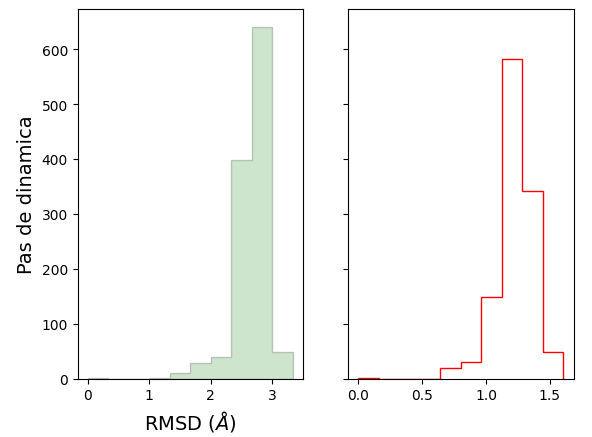


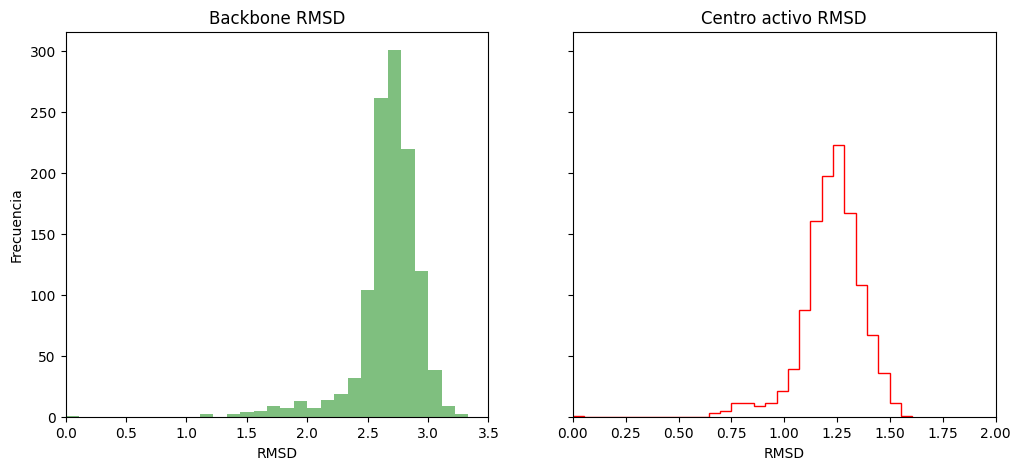

In [5]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

# RESPUESTA
# Importamos las librerias
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Cargamos los datos del archivo
datos = np.loadtxt('rmsd_uoc.dat')

# Separamos las columnas
rmsd_backbone = datos[:, 1]
rmsd_centroactivo = datos[:, 3]

# Creamos los dos sbuplots con el mismo eje Y
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 5))

# Histograma backbone
ax1.hist(rmsd_backbone, bins=30, color='green', alpha=0.5) # histograma
ax1.set_title('Backbone RMSD')  # titulo del subplot
ax1.set_xlabel('RMSD') # titulo del eje X
ax1.set_ylabel('Frecuencia') # titulo del eje Y
ax1.set_xlim(0, 3.5) # limite eje X

# Histograma centro activo
ax2.hist(rmsd_centroactivo, bins=30, histtype='step', color='red')
ax2.set_title('Centro activo RMSD')
ax2.set_xlabel('RMSD')
ax2.set_xlim(0, 2)

# Mostramos el histograma
plt.show()

### **Ejercicio 3**



Existen una gran variedad de base de datos para todos los tipos de sistemas biológicos en que estemos interesados. Una de ellas es la base de datos llamada **CAZy** (http://www.cazy.org/), en que podemos encontrar descritas todas las familias de módulos catalíticos y de unión de carbohidratos relacionados estructuralmente (o dominios funcionales) de enzimas que degradan, modifican o crean enlaces glicosídicos, denominados **CAZymes**.

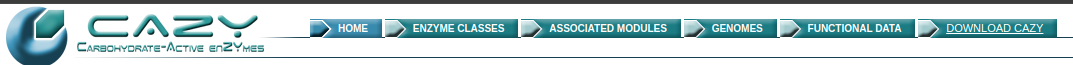

Aparte de consultar directamente la proteína en la que estemos interesados, podemos analizar este conjunto de datos descargándolas desde la página web. En este fichero podemos encontrar varías columnas con información diversa.

* **Primera columna**: Nombre de la clase de CAZyme, seguido con número de la familia a la cual pertenece
* **Segunda columna**: tipo de organismo donde se ha encontrado (Eukariota, bacteria...)
* **Tercera columna**: Organizme exacto donde se ha encontrado
* **Siguientes columnas**: Número de clasificación y en qué bases de datos se pueden encontrar.

Descargaréis un archivo denominado **cazy_fecha_*Aspergillus.txt* en que por motivos de medida, se ha dejado solo la información por los organismos Aspergillus.

In [7]:
# Ejecutad primero esta celda pàra descargar el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/cazy_data_Aspergillus.txt --no-check-certificate

--2025-04-29 18:22:30--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/cazy_data_Aspergillus.txt
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 18.201.253.30
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|18.201.253.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2879244 (2.7M) [text/plain]
Saving to: ‘cazy_data_Aspergillus.txt’

cazy_data_Aspergill 100%[===================>]   2.75M  2.38MB/s    in 1.2s    

2025-04-29 18:22:32 (2.38 MB/s) - ‘cazy_data_Aspergillus.txt’ saved [2879244/2879244]



En este ejercicio tendremos que crear dos funciones en que las suyas características tienen que ser las siguientes:
* **es_digit()**: Creáis una función en que la variable de entrada se puede corresponder a un texto en que hay letras y números y tiene que devolver solo las letras en una sola variable en formato de string.
* **clasifica_classes_CAZymes()**: Creáis una función en que la variable de entrada sea un fichero de texto descargado de la base de datos CAZy y que clasifique en un diccionario, las clases de CAZymes que hay en aquel fichero y sus valores se corresponden a la cantidad existente por cada clase.

Finalmente, feudo un gráfico de diagrama de sectores (o pie chart en ángulos) en que se vean los porcentajes para cada clase, tal y como se ve en la siguiente figura.


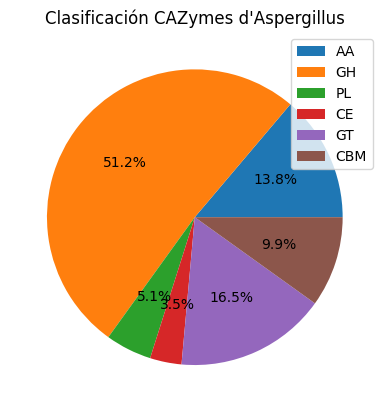

{'AA': 6541, 'GH': 24252, 'PL': 2392, 'CE': 1633, 'GT': 7825, 'CBM': 4686}


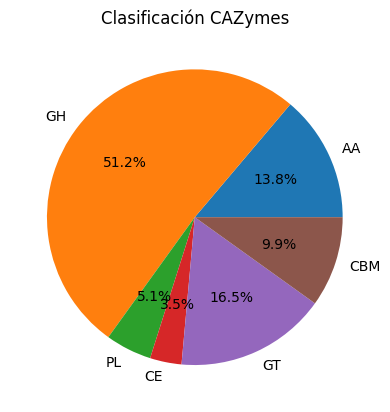

In [8]:
# para poder visualizar el gráàfico en este notebook
%matplotlib inline

# importamos los módulos necessarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def es_digit(data):
  # Función que encuentra si un valor de un string es un digito o no, y solamente develve
  # los valores correspondientes a las letras
  # RESPUESTA
  # Tras iterar el texto con char for char, con char.isalpha() se devuelven los caracteres tipo str,
  # sin distinción entre mayúscula o minúscula
  letras = ''.join([char for char in data if char.isalpha()])
  return letras

def clasifica_classes_CAZymes(data):
  # Función en que creamos un diccionario en que las keys sueño el tipo de clases
  # que pueden llegar a existir por los CAZymes y los valores se corresponde a la
  # cantidad existente de estas clases.
  CAZymes = {}
  with open(data, "r") as infile:
    for line in infile:
      # respuesta
      # Separamos las columnas por tabulaciones
      fields = line.split('\t')
      # Asignamos la clase con el valor 'str' de la primera columna
      clase_cazyme = es_digit(fields[0]) # la primera columna es la clase

      # Añadimos las clases y su valor al diccionario
      if clase_cazyme in CAZymes:
        CAZymes[clase_cazyme] += 1
      else:
        CAZymes[clase_cazyme] = 1

  return CAZymes

# Llamamos a la funcion para ver el diccionario
dict_cazymes = clasifica_classes_CAZymes('cazy_data_Aspergillus.txt')
print(dict_cazymes)

# Sacamos la clase y frecuencias del diccionario
clases = dict_cazymes.keys()
frecuencias = dict_cazymes.values()

# Realizamos el grafico
plt.pie(frecuencias, labels=clases, autopct='%1.1f%%')
plt.title('Clasificación CAZymes') # titulo
plt.show()

###**Ejercicios entregables**

**IMPORTANTE:** Recordad que es necesaria la línea

```python
%matplotlib inline
```
al principio de cada celdilla de código para que podáis visualizar los gráficos en este notebook.

### Ejercicio 1 **<font color="green" size="+2">MU</font>**

Representa en un único gráfico las funciones arcocoseno y arcoseno en el intervalo `[-pi, pi*2]` (en radianes) con un step de `0.05`. Deberíais obtener una imagen de ese estilo:


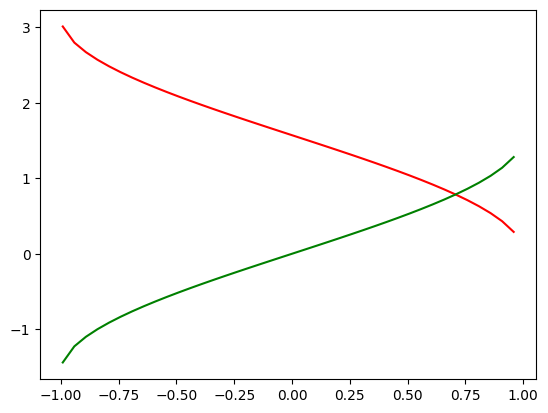

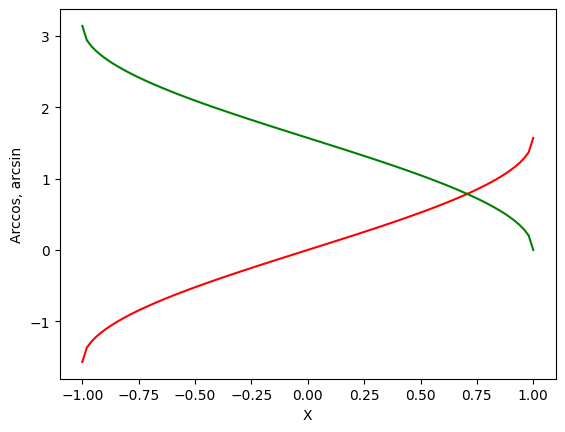

In [ ]:
%matplotlib inline

# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt

#Respuesta
# Calculamos un array de -PI a 2*PI con un paso de 0.05
x = np.arange(-np.pi, np.pi*2, 0.05)

# Definimos los valores válidos para arcsin y arccos
x = np.linspace(-1, 1, 100)

# Creamos la gráfica
plt.plot(x, np.arcsin(x), 'r', x, np.arccos(x), 'g')
plt.xlabel('X')
plt.ylabel('Arccos, arcsin')
plt.show()

### Ejercicio 2 **<font color="blue" size="+2">EG</font>**

Representa en un gráfico 3D la función `f(x,y) = cos(x) + sin(y)^2` en el intervalo `[-3, 3]` con un step de `0.1`

Podéis consultar ejemplos de graficos 3D aquí: https://matplotlib.org/stable/plot_types/index.html


La representación debería ser similar a la siguiente:

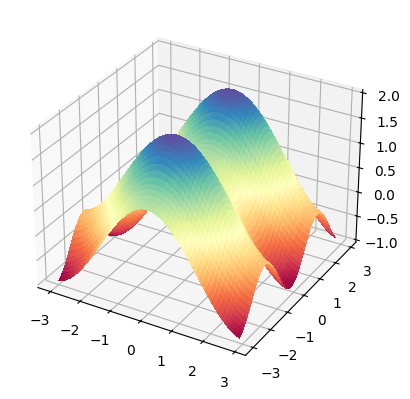

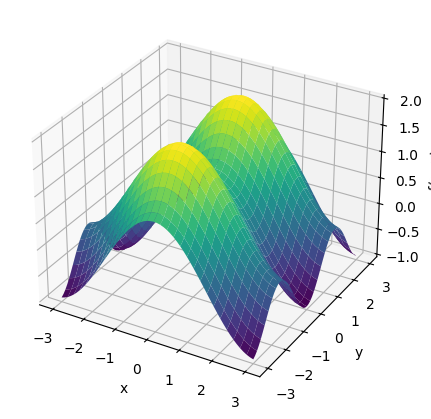

In [ ]:
# Respuesta
# Importamos las liberias
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Definimos los valores x, y en [-3, 3] con paso 0.1
x = np.arange(-3, 3.1, 0.1)
y = np.arange(-3, 3.1, 0.1)
X, Y = np.meshgrid(x, y)

# Definimos la funcion f(x, y) = cos(x) + sin(y)^2
Z = np.cos(X) + np.sin(Y)**2

# Creamos el grafico 3D
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

# Creamos la superficie
ax.plot_surface(X,Y,Z, cmap='viridis', edgecolor='none')

# Añadimos las etiquetas
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Mostramos el grafico
plt.show()

### Ejercicio 3 **<font color="blue" size="+2">EG</font>**
Representa la función que quieras de la forma que consideres. Sé creativo a la hora de escoger la función a representar y el intervalo de valores.

Podéis consultar https://matplotlib.org/stable/plot_types/index.html para inspiraros.

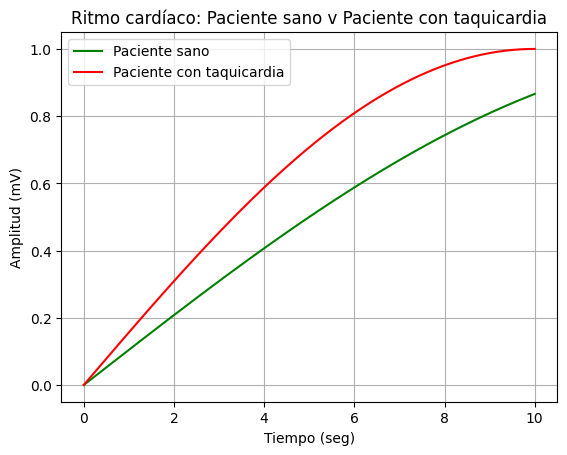

In [ ]:
%matplotlib inline

# Vamos a representar la simulación de un ritmo cardíaco para un paciente sano y otro con taquicardia

# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parametros de las fórmulas
A = 1 # Amplitud, asumimos un valor constante
frec_sano = 1/60 # Suponemos 1 latido * segundo
frec_taquicardia = 1.5/60 # Suponemos 1.5 latidos * segundo
t = np.linspace(0, 10, 1000) # tiempo: 10 segundos de 0 a 10 (con 1000 intervalos)

# Definimos las formulas para el paciento sano y el paciente con taquicardia
# H(t) = A * sin(2*pi*f*t)
p_sano = A * np.sin(2 * np.pi * frec_sano * t)
p_taquicardia = A * np.sin(2 * np.pi * frec_taquicardia * t)

# Representamos el grafico
plt.plot(t, p_sano, label='Paciente sano', color='green')
plt.plot(t, p_taquicardia, label='Paciente con taquicardia', color='red')

plt.title('Ritmo cardíaco: Paciente sano v Paciente con taquicardia') # título
plt.xlabel('Tiempo (seg)') # título eje x
plt.ylabel('Amplitud (mV)') # título eje y
plt.grid(True) # cuadrícula
plt.legend() # leyenda
plt.show()

Para el estudio y la conclusión de fórmulas se han empleado las siguientes **referencias**:

Ilyas, M. A., Zhang, Y., & Wang, L. (Eds.). (2020). *Biomedical signal processing and artificial intelligence in healthcare.* Springer.

### Ejercicio 4 **<font color="green" size="+2">MU</font>**

Dados los siguientes datos de meteorología registrados en el aeropuerto de Barcelona, representa en uno o varios gráficos los valores de temperatura máxima, mínima, media anual, huedadrelativa y media de lluvias mensual.

Las posiciones del vector `meteo` son las siguientes:

* Nombre mes
* Temperatura máxima media (°C)
* Temperatura mínima media (°C)
* Temperatura media anual del mes (°C)
* Humedad media relativa (%)
* Media de lluvias mensual (mm)

Hagan las siguientes representaciones gráficas::

1. En un gráfico de lineas, representar las temperaturas màximas, medias y minimas de cada mes (en varios colores)
2. La relación entre la temperatura media y la humidad relativa, en un gráfico de puntos.
3. Un gráfico de barras y línias combinado que exprese la media mensual de lluvia y la humidad relativa, por mes.

No olviden etiquetar ejes (incluyendo unidades y nombre de las variables) y añadir leyendas si se precia.

La representación debe devolver gráficos similares a los siguientes

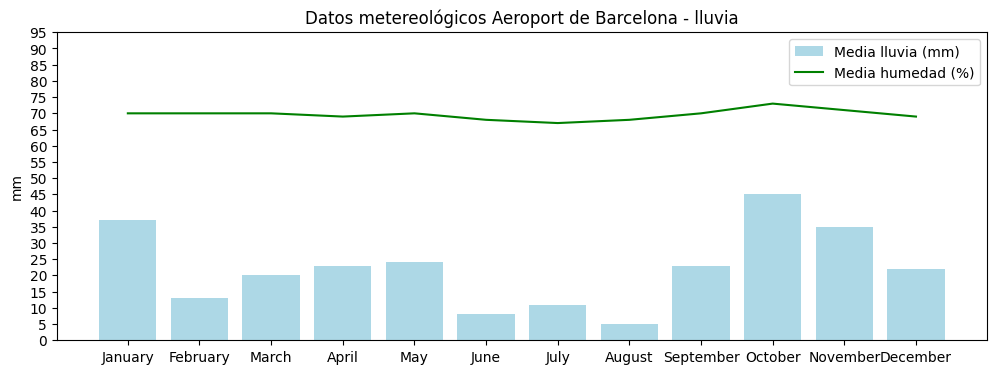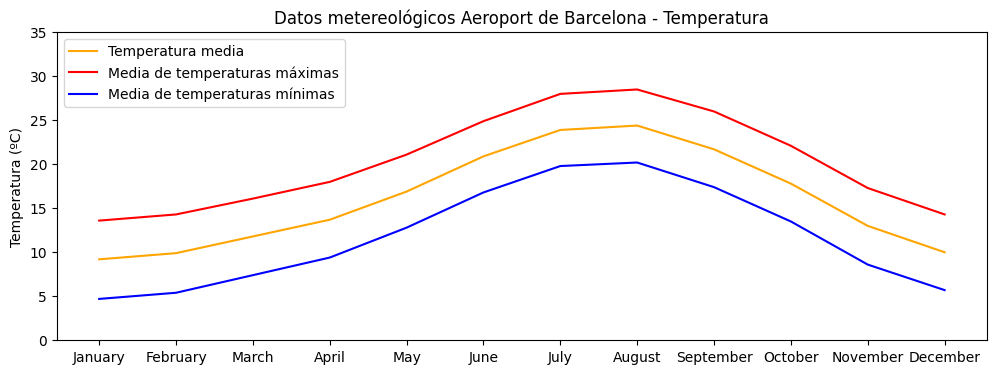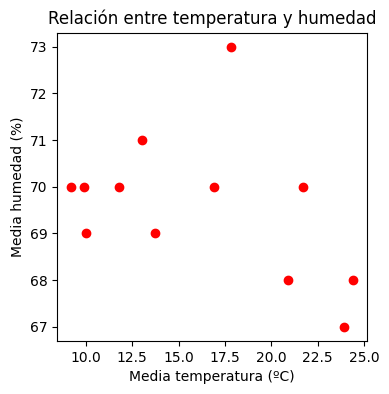

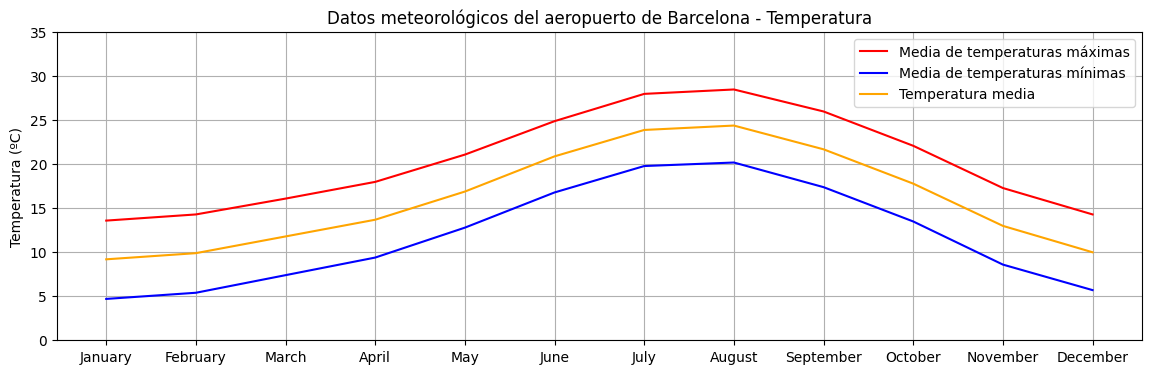

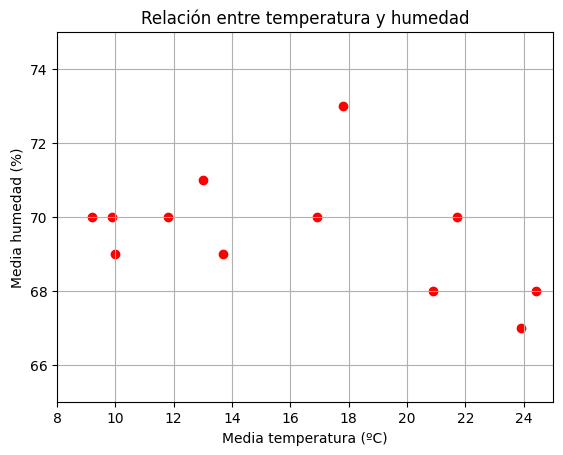

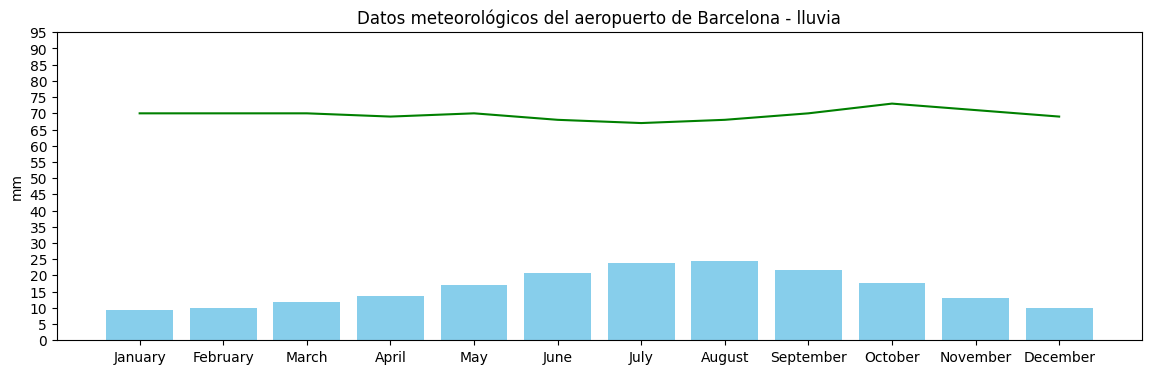

In [ ]:
%matplotlib inline

meteo = [["January", 13.6, 4.7, 9.2, 70, 37],
["February",14.3, 5.4, 9.9, 70, 13],
["March", 16.1, 7.4, 11.8, 70, 20],
["April", 18.0, 9.4, 13.7, 69, 23],
["May", 21.1, 12.8, 16.9, 70, 24],
["June", 24.9, 16.8, 20.9, 68, 18],
["July", 28.0, 19.8, 23.9, 67, 11],
["August", 28.5, 20.2, 24.4, 68, 5],
["September", 26.0, 17.4, 21.7, 70, 23],
["October", 22.1, 13.5, 17.8, 73, 45],
["November", 17.3, 8.6, 13.0, 71, 35],
["December", 14.3, 5.7, 10.0, 69, 22]]

# Respuesta
# Importamos librerias
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


# Convertimos los datos en un array de objetos (por mezclar 'str' + 'float')
meteo_arr = np.array(meteo, dtype='object')

# Gráfico 1
# Definimos los parametros
meses = meteo_arr[:, 0] # Meses del año (primera columna del array)
t_max = meteo_arr[:, 1] # Tº máxima (1º columna)
t_min = meteo_arr[:, 2] # Tº mínima (2º columna)
t_media = meteo_arr[:, 3] # Tº media (3º columna)

# Realizamos el gráfico
plt.figure(figsize=(14, 4))  # dimensiones (ancho 14, alto 4)
plt.plot(meses, t_max, label='Media de temperaturas máximas', color='red') # línea para t_max con título y color rojo
plt.plot(meses, t_min, label='Media de temperaturas mínimas', color='blue') # línea para t_min con título y color azul
plt.plot(meses, t_media, label='Temperatura media', color='orange') # línea para t_media con título y color naranja

plt.ylim(0, 35) # límites del eje Y
plt.title('Datos meteorológicos del aeropuerto de Barcelona - Temperatura') # título
plt.ylabel('Temperatura (ºC)') # título eje Y
plt.legend() # leyenda
plt.grid(True) # cuadrícula
plt.show()

# Gráfico 2
# Definimos el parámetro para la humedad relativa
h_relativa = meteo_arr[:, 4]

# Realizamos el gráfico de puntos
plt.scatter(t_media, h_relativa, color='red')
plt.axis([8, 25, 65, 75]) # definimos los límites de los ejes
plt.title('Relación entre temperatura y humedad')
plt.xlabel('Media temperatura (ºC)') # título eje X
plt.ylabel('Media humedad (%)') # título eje Y
plt.grid(True) # cuadrícula
plt.show()

# Gráfico 3
# Realizamos el gráfico
plt.figure(figsize=(14, 4))  # dimensiones (ancho 14, alto 4)
plt.bar(meses, t_media, label='Media lluvía (mm)', color='skyblue') # gráfico de barras para la media de lluvia
plt.plot(meses, h_relativa, label='Media humedad (%)', color='green') # gráfico líneal con la humedad relativa
plt.yticks(np.arange(0, 100, 5))  # Eje Y de 0 a 95 con intervalos de 5
plt.title('Datos meteorológicos del aeropuerto de Barcelona - lluvia') # título del gráfico
plt.ylabel('mm') # título del eje Y
plt.show()
